# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from config import api_key
from citipy import citipy


In [2]:
output_data_file = "output_data/cities.csv"

In [3]:
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:

lat_lngs = []
cities = []


lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500) 
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
lat = []
long = []
temp_max = []
city_name = []
clouds = []
wind_speed = []
humidity = []
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url1 = url + "appid=" + api_key + "&q="
count_city = 0
count_fail = 0
city_set = 1
print("Beginning Data Retrieval")     
print("-----------------------------")
for city in cities:
    count_city += 1
    print(f"Beginning Data Retrieval {count_city} of Set {city_set}")  
    query_url = f"{query_url1} + {city} + &units={units}"
    try:
        weather_json = requests.get(query_url).json()
        lat.append(weather_json["coord"]["lat"])
        long.append(weather_json["coord"]["lon"])
        temp_max.append(weather_json["main"]["temp_max"])
        city_name.append(weather_json["name"])
        clouds.append(weather_json["clouds"]["all"])
        wind_speed.append(weather_json["wind"]["speed"])
        humidity.append(weather_json["main"]["humidity"])
        if count_city % 50 == 0:
            city_set += 1
            count_city = 0       
    except:
        BOLD = '\033[1m'
        END = '\033[0m'
        print(f"{city.title()} was {BOLD}NOT{END} found. Skipping...")
        if count_city % 50 == 0:
            city_set += 1
            count_city = 0
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
    

Beginning Data Retrieval
-----------------------------
Beginning Data Retrieval 1 of Set 1
Beginning Data Retrieval 2 of Set 1
Beginning Data Retrieval 3 of Set 1
Beginning Data Retrieval 4 of Set 1
Beginning Data Retrieval 5 of Set 1
Beginning Data Retrieval 6 of Set 1
Beginning Data Retrieval 7 of Set 1
Beginning Data Retrieval 8 of Set 1
Beginning Data Retrieval 9 of Set 1
Beginning Data Retrieval 10 of Set 1
Beginning Data Retrieval 11 of Set 1
Beginning Data Retrieval 12 of Set 1
Beginning Data Retrieval 13 of Set 1
Beginning Data Retrieval 14 of Set 1
Beginning Data Retrieval 15 of Set 1
Beginning Data Retrieval 16 of Set 1
Beginning Data Retrieval 17 of Set 1
Beginning Data Retrieval 18 of Set 1
Beginning Data Retrieval 19 of Set 1
Beginning Data Retrieval 20 of Set 1
Beginning Data Retrieval 21 of Set 1
Beginning Data Retrieval 22 of Set 1
Belushya Guba was NOT found. Skipping...
Beginning Data Retrieval 23 of Set 1
Beginning Data Retrieval 24 of Set 1
Beginning Data Retrieval 

Beginning Data Retrieval 40 of Set 4
Beginning Data Retrieval 41 of Set 4
Beginning Data Retrieval 42 of Set 4
Beginning Data Retrieval 43 of Set 4
Beginning Data Retrieval 44 of Set 4
Beginning Data Retrieval 45 of Set 4
Beginning Data Retrieval 46 of Set 4
Beginning Data Retrieval 47 of Set 4
Beginning Data Retrieval 48 of Set 4
Beginning Data Retrieval 49 of Set 4
Beginning Data Retrieval 50 of Set 4
Beginning Data Retrieval 1 of Set 5
Beginning Data Retrieval 2 of Set 5
Beginning Data Retrieval 3 of Set 5
Beginning Data Retrieval 4 of Set 5
Beginning Data Retrieval 5 of Set 5
Beginning Data Retrieval 6 of Set 5
Beginning Data Retrieval 7 of Set 5
Beginning Data Retrieval 8 of Set 5
Beginning Data Retrieval 9 of Set 5
Nizhneyansk was NOT found. Skipping...
Beginning Data Retrieval 10 of Set 5
Beginning Data Retrieval 11 of Set 5
Beginning Data Retrieval 12 of Set 5
Beginning Data Retrieval 13 of Set 5
Beginning Data Retrieval 14 of Set 5
Beginning Data Retrieval 15 of Set 5
Beginnin

Beginning Data Retrieval 38 of Set 8
Beginning Data Retrieval 39 of Set 8
Beginning Data Retrieval 40 of Set 8
Katobu was NOT found. Skipping...
Beginning Data Retrieval 41 of Set 8
Bababe was NOT found. Skipping...
Beginning Data Retrieval 42 of Set 8
Beginning Data Retrieval 43 of Set 8
Beginning Data Retrieval 44 of Set 8
Beginning Data Retrieval 45 of Set 8
Ruatoria was NOT found. Skipping...
Beginning Data Retrieval 46 of Set 8
Beginning Data Retrieval 47 of Set 8
Beginning Data Retrieval 48 of Set 8
Krasnoselkup was NOT found. Skipping...
Beginning Data Retrieval 49 of Set 8
Beginning Data Retrieval 50 of Set 8
Beginning Data Retrieval 1 of Set 9
Beginning Data Retrieval 2 of Set 9
Beginning Data Retrieval 3 of Set 9
Beginning Data Retrieval 4 of Set 9
Beginning Data Retrieval 5 of Set 9
Beginning Data Retrieval 6 of Set 9
Beginning Data Retrieval 7 of Set 9
Beginning Data Retrieval 8 of Set 9
Tuggurt was NOT found. Skipping...
Beginning Data Retrieval 9 of Set 9
Avera was NOT fo

Beginning Data Retrieval 21 of Set 12
Beginning Data Retrieval 22 of Set 12
Beginning Data Retrieval 23 of Set 12
Beginning Data Retrieval 24 of Set 12
Beginning Data Retrieval 25 of Set 12
Jubayl was NOT found. Skipping...
Beginning Data Retrieval 26 of Set 12
Beginning Data Retrieval 27 of Set 12
Beginning Data Retrieval 28 of Set 12
Beginning Data Retrieval 29 of Set 12
Beginning Data Retrieval 30 of Set 12
Beginning Data Retrieval 31 of Set 12
Barawe was NOT found. Skipping...
Beginning Data Retrieval 32 of Set 12
Beginning Data Retrieval 33 of Set 12
Beginning Data Retrieval 34 of Set 12
Beginning Data Retrieval 35 of Set 12
Beginning Data Retrieval 36 of Set 12
Beginning Data Retrieval 37 of Set 12
Beginning Data Retrieval 38 of Set 12
Beginning Data Retrieval 39 of Set 12
Beginning Data Retrieval 40 of Set 12
Jomalig was NOT found. Skipping...
Beginning Data Retrieval 41 of Set 12
Beginning Data Retrieval 42 of Set 12
Beginning Data Retrieval 43 of Set 12
Beginning Data Retrieva

In [6]:
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 32.51, 'lon': -92.12},
 'dt': 1562116200,
 'id': 4333669,
 'main': {'humidity': 78,
          'pressure': 1014,
          'temp': 83.05,
          'temp_max': 86,
          'temp_min': 80.6},
 'name': 'Monroe',
 'sys': {'country': 'US',
         'id': 3494,
         'message': 0.0073,
         'sunrise': 1562065499,
         'sunset': 1562116782,
         'type': 1},
 'timezone': -18000,
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 146.369, 'speed': 5.46}}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_dict = {"Max Temperature": temp_max, "Longitude": long, "Latitude": lat, "Humidity": humidity, "City": city_name, "Cloudiness": clouds, "Wind Speed": wind_speed}
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,Max Temperature,Longitude,Latitude,Humidity,City,Cloudiness,Wind Speed
0,62.01,-7.27,40.54,60,Guarda,1,0.69
1,57.20,-156.79,71.29,71,Barrow,90,13.87
2,33.80,-70.92,-53.15,87,Punta Arenas,75,12.75
3,77.00,-175.20,-21.20,83,Vaini,75,17.22
4,86.00,-121.94,50.69,25,Lillooet,20,8.34


In [10]:
weather_df.count()

Max Temperature    534
Longitude          534
Latitude           534
Humidity           534
City               534
Cloudiness         534
Wind Speed         534
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [11]:
lat = weather_df["Latitude"]
temp = weather_df["Max Temperature"]


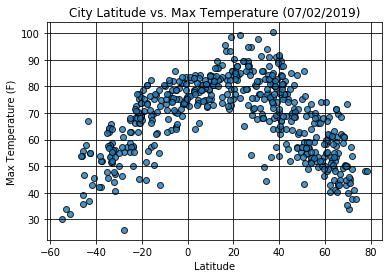

In [12]:
plt.scatter(lat, temp, edgecolor ="black", 
            linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Max Temperature (07/02/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(b=True, which='major', color='black', linestyle='-')
plt.savefig("latvsMaxtemp.png")
plt.show()


#### Latitude vs. Humidity Plot

In [13]:
hum = weather_df["Humidity"]


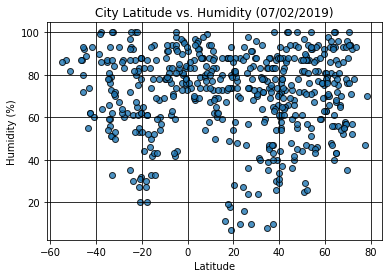

In [14]:
plt.scatter(lat, hum, edgecolor ="black", 
            linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Humidity (07/02/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=True, which='major', color='black', linestyle='-')
plt.savefig("latvsHumidity.png")
plt.show()


#### Latitude vs. Cloudiness Plot

In [15]:
cloud = weather_df["Cloudiness"]

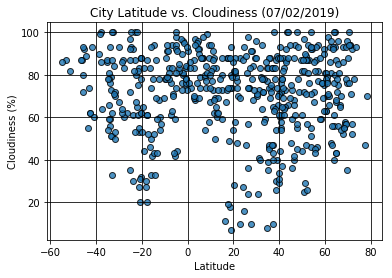

In [16]:
plt.scatter(lat, hum, edgecolor ="black", 
            linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Cloudiness (07/02/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True, which='major', color='black', linestyle='-')
plt.savefig("latvsCloudiness.png")
plt.show()


#### Latitude vs. Wind Speed Plot

In [17]:
wind_speed = weather_df["Wind Speed"]

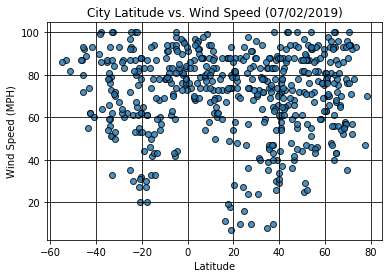

In [18]:
plt.scatter(lat, hum, edgecolor ="black", 
            linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Wind Speed (07/02/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(b=True, which='major', color='black', linestyle='-')
plt.savefig("latvsWindSpeed.png")
plt.show()
